#### stratified, spatial training-test split p. 25ff. in the Thesis

- 3 of 16 stations are used as held-out test set
- test stations are selected through clustering (of features) to be stratified and thereby representative
- the remaining 13 stations are used for training and tuning through (leave-one-out) cross-validation


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Assuming 'id' is the column with station identifiers
location_features = ['prop_intercept_200', 'prop_intercept_50', 'GVI_50', 'GVI_200', 'tvi_50', 'tvi_200', 'prop_main_', 'nearest_st', 'nearest_in', 'pop_200','pop_500'] 

data = pd.read_csv('../datasets/df_pollution_2023_berlin_imputed.csv')
features_data = data[location_features]  # Select only location features for clustering
station_ids = data['id']  # Keep station ids for labeling in plots

# Scale the data to normalize it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Measure the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
print("The average silhouette_score is :", silhouette_avg)

# Reduce dimensions to 2D for visualization, using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

c:\Users\richa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.35846311341471226


c:\Users\richa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.24503786577889167


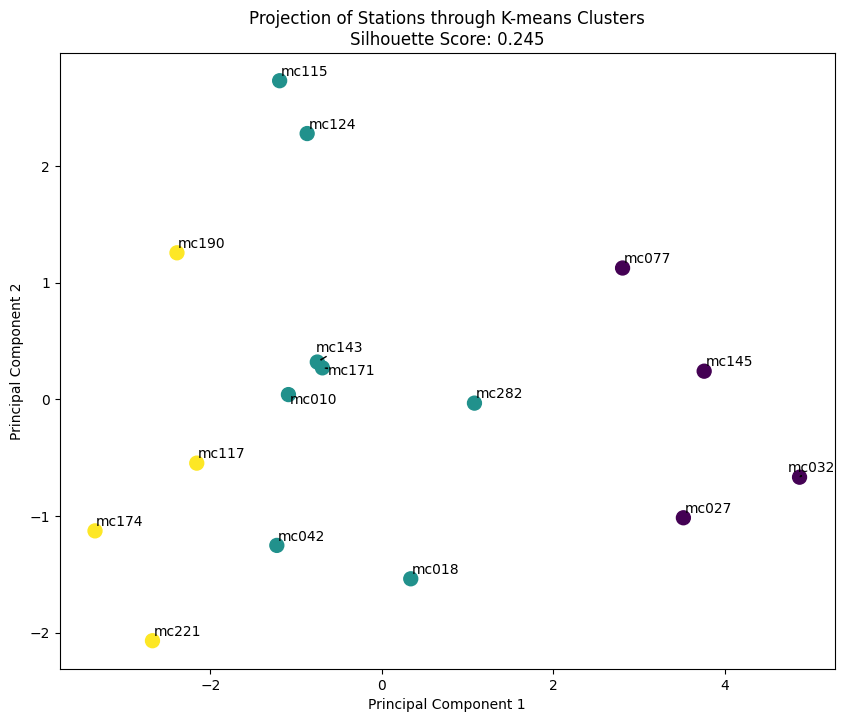

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from adjustText import adjust_text

# Assuming 'id' is the column with station identifiers
location_features = ['prop_intercept_200', 'prop_intercept_50', 'GVI_50', 'GVI_200', 'tvi_50', 'tvi_200', 'prop_main_', 'nearest_st', 'nearest_in', 'pop_200', 'pop_500']

data = pd.read_csv('../datasets/df_pollution_2023_berlin_imputed.csv')
# Group by station id and calculate mean of features
station_features = data.groupby('id')[location_features].mean().reset_index()

# Keep station ids for labeling in plots
station_ids = station_features['id'].values

# Scale the data to normalize it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(station_features[location_features])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Measure the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
print("The average silhouette_score is :", silhouette_avg)

# Reduce dimensions to 2D for visualization, using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=100)

# Annotate the station ids
texts = []
for i, txt in enumerate(station_ids):
    texts.append(plt.text(X_pca[i, 0], X_pca[i, 1], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

plt.title(f'Projection of Stations through K-means Clusters\nSilhouette Score: {round(silhouette_avg, 3)}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('data/output/cluster/clusterknn.png', dpi=300)
plt.show()
